# APM1137 - Nonlinear Systems
## Formative Assessment 1 Part 2

**Problem Solving**

<center><h3>Proofs of Convergence</h3></center>

### **1. Linear Convergence of the Sequence $ p_n = \frac{1}{n} $ to $ p = 0 $**

**Definition:** A sequence $ \{p_n\} $ converges linearly to $ p $ if there exists a constant $ 0 < λ < 1 $ such that
$$
|p_{n+1} - p| \leq λ |p_n - p|
$$
for all sufficiently large $ n $.

**Proof:**
Consider the sequence$ p_n = \frac{1}{n}$ for$ n \geq 1$.

$$
\lim_{n \to \infty} p_n = \lim_{n \to \infty} \frac{1}{n} = 0
$$

Let $p = 0$. We need to show that there exists a constant $0 < λ < 1$ such that
$$
|p_{n+1} - 0| \leq λ |p_n - 0|
$$

$$
|p_{n+1}| = \left| \frac{1}{n+1} \right| \quad \text{and} \quad |p_n| = \left| \frac{1}{n} \right|
$$

$$
\left| \frac{1}{n+1} \right| \leq \left| \frac{1}{n} \right|
$$

Since $ \frac{1}{n+1} < \frac{1}{n}$ for all $ n \geq 1 $, we can choose $λ = 1$. Therefore,
$$
|p_{n+1}| \leq |p_n|
$$

Hence, the sequence $ p_n = \frac{1}{n} $ converges linearly to $ p = 0 $.

<center><h3>Quadratic Convergence of the Sequence</h3></center>

**Definition:** A sequence $ \{p_n\} $ converges quadratically to $ p $ if there exists a constant $ \lambda > 0 $ such that  
$$
|p_{n+1} - p| \leq \lambda |p_n - p|^2
$$  
for all sufficiently large $ n $.

**Proof:**  
Consider the sequence $ p_n = 10^{-2^n} $ for $ n \geq 0 $. Clearly,  
$$
\lim_{n \to \infty} p_n = \lim_{n \to \infty} 10^{-2^n} = 0.
$$  
Let $ p = 0 $. We check if there exists a constant $ \lambda > 0 $ such that  
$$
|p_{n+1} - 0| \leq \lambda |p_n - 0|^2.
$$  

Since  
$$
|p_n| = 10^{-2^n} \quad \text{and} \quad |p_{n+1}| = 10^{-2^{(n+1)}} = 10^{-2 \cdot 2^n} = (10^{-2^n})^2,
$$  
we obtain  
$$
|p_{n+1}| = |p_n|^2.
$$  
Thus, the condition for quadratic convergence holds with $ \lambda = 1 $:  
$$
|p_{n+1}| \leq 1 \cdot |p_n|^2.
$$  

Hence, the sequence $ p_n = 10^{-2^n} $ converges quadratically to $ p = 0 $

### Third Item:
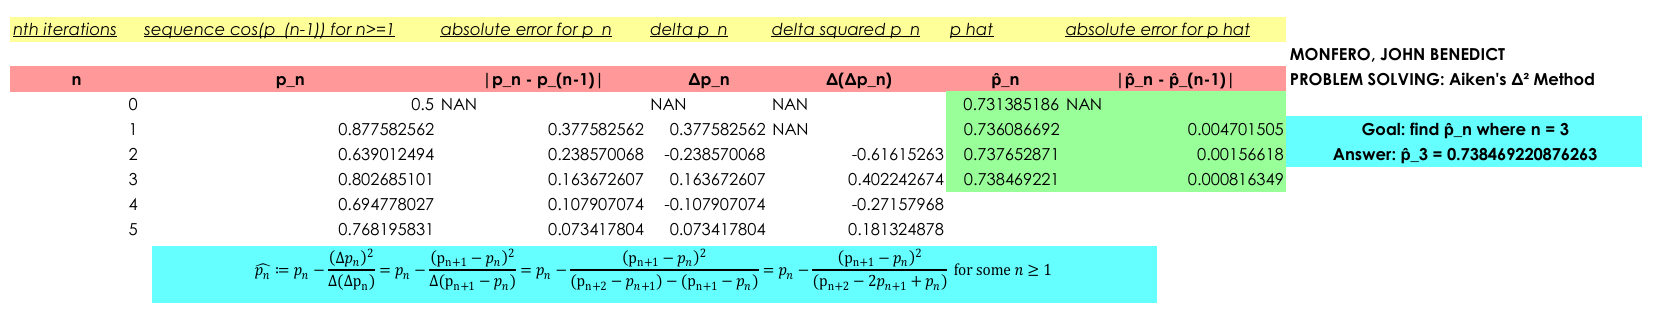

# APM1137 - Nonlinear Systems
## Formative Assessment 1 Part 2

**Machine Problems**

In [1]:
# Import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<center><h3>Newton's Method</h3></center>

Newton's Method is an iterative technique used to find approximate roots of a real-valued function. It is particularly useful for solving nonlinear equations of the form:

$$
f(x) = 0
$$

### Formula:

Given an initial guess $x_0$, Newton's iteration formula is:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

where:

- $x_n$ is the current approximation of the root.
- $f(x)$ is the function whose root is being approximated.
- $f'(x)$ is the derivative of $f(x)$.
- $x_{n+1}$ is the next improved approximation.

### How to Use Newton's Method:

1. **Choose an initial guess** $x_0$.
2. **Compute** $f(x_n)$ and $f'(x_n)$.
3. **Update** $x_{n+1}$ using the formula.
4. **Repeat the process** until $|x_{n+1} - x_n|$ is sufficiently small (convergence criterion).
5. The final value of $x_n$ is the estimated root.

### Convergence:

- If $f(x)$ is well-behaved near the root and $f'(x) \neq 0$, Newton’s method exhibits **quadratic convergence**.
- However, if $f'(x)$ is close to zero or if the initial guess is poor, the method may **fail to converge**.

Newton’s method is widely used due to its fast convergence, but care must be taken in choosing a good initial guess to avoid divergence.


In [2]:
def Newton_Method(p0, tol=0.00001, n_max = 100):
    data = []
    p = p0
    
    for n in range(0, n_max):
        fp = f(p)
        f_prime_p = f_prime(p)

        # Convergence Condition check: f'(x) != 0
        if f_prime_p == 0:
            print("if is close to zero or if the initial guess is poor, the method may fail to converge.")
            return None
            
        # Else, the condition remains to satisfy and proceed to find new fp
        p_new = p - (fp / f_prime_p)
        data.append([n, p, fp, f_prime_p, p_new])

        #Tolerance of Error == less than 10**(-5)
        if abs(p_new - p) < tol:
            break

        #new value for p
        p = p_new
        
    #Preview the entire results as table view - Dataframe
    df = pd.DataFrame(data, columns=["i", "pᵢ", "f(pᵢ)", "f'(pᵢ)", "pᵢ₊₁"])
    return df

<center><h3>Aitken's Method</h3></center>

$$
\hat{p}_n = p_n - \frac{(\Delta p_n)^2}{\Delta^2 p_n}
$$

where:

- $p_n$ is the sequence of iterates.
- $\Delta p_n = p_{n+1} - p_n$ is the first difference.
- $\Delta^2 p_n = (p_{n+2} - p_{n+1}) - (p_{n+1} - p_n) = p_{n+2} - 2p_{n+1} + p_n$ is the second difference.

This formula accelerates the convergence of a sequence $p_n$ when it converges linearly, effectively improving the rate of convergence by eliminating the leading error term.

To apply Aitken’s method iteratively:

1. Compute $p_n, p_{n+1}, p_{n+2}$.
2. Compute $\hat{p}_n$ using the formula.
3. Repeat the process using $\hat{p}_n$ as the new approximation.

$$
\hat{p}_n = p_n - \frac{(p_{n+1} - p_n)^2}{p_{n+2} - 2p_{n+1} + p_n}
$$

If $\Delta^2 p_n \approx 0$, then $\hat{p}_n$ becomes unstable, meaning the method is not applicable in such cases.


In [3]:
# `p_seq` is a list composed of at least three consecutive sequence of p_n 
# := [p_n, p_(n+1), p_(n+2)] for n>=1

def Aitken_Delta2_Method(p_seq, tol = 0.0000000001):
    data = []
    n = 1
    
    # This is where the initial assumption shall be checked:
    # p_n, p_(n+1), p_(n+2) shall exists before performing aiken's method
    while n + 2 <= len(p_seq):
        p_n = p_seq[n-1] # since python arrays starts on element 0th rather than 1st
        delta_p_n = p_seq[n] - p_n #first difference
        delta_delta_p_n = p_seq[n + 1] - 2 * p_seq[n] + p_n #second difference
        
        #Check the value of delta__delta_p_n (avoid division by zero)
        if delta_delta_p_n == 0:
            print("Δ²p_n is zero, Aitken's method is not applicable at iteration", n)
            break

        #Aitken's Method
        p_hat = p_n - (((delta_p_n)**2)/(delta_delta_p_n))
        data.append([n, p_n, delta_p_n, delta_delta_p_n, p_hat])

        #Tolerance of Error == less than 10**(-10)
        if abs(p_hat - p_n) < tol:
            break

        #Next Iteration
        n+=1
    # Store results in a DataFrame
    df = pd.DataFrame(data, columns=["i", "p_n", "Δp_n", "Δ²p_n", "p̂_n"])
    return df      

<h4 style="color:red">Exercise 1: Use Newton's Method and Aiken's $\Delta^2$ method to approximate the zero of $f(x)=\cos(x)$, with $p_0=0.5$</h4>

In [4]:
# f(x) = cos(x)
def f(x):
    return np.cos(x)
    
# derivative of cos(x) = -sin(x)
def f_prime(x):
    return np.sin(x)*(-1)

newton_result = Newton_Method(p0 = 0.5, tol = 1e-10, n_max = 20)
newton_result = newton_result.round(10)  # Round to 10 decimal places
newton_result

,i,pᵢ,f(pᵢ),f'(pᵢ),pᵢ₊₁
0,0,0.500000,8.775826e-01,-0.479426,2.330488
1,1,2.330488,-6.886977e-01,-0.725049,1.380623
2,2,1.380623,1.890286e-01,-0.981972,1.573123
3,3,1.573123,-2.326235e-03,-0.999997,1.570796
4,4,1.570796,4.200000e-09,-1.000000,1.570796
5,5,1.570796,0.000000e+00,-1.000000,1.570796


<h5 style="color:red">
    Note: $\pi/2 \approx 1.57079632679$; the root $p = \pi/2$, it can make the function $f(p)=\cos(p) = 0$, thus $p_5 \approx p_6 \approx p \approx \pi/2$</h5>

In [5]:
# Extract the "pᵢ₊₁" column as a NumPy array or list
p_seq = newton_result["pᵢ₊₁"].to_numpy()  # Converts to NumPy array
# OR
p_seq = newton_result["pᵢ₊₁"].tolist()  # Converts to Python list

# Now, you can use p_seq in Aitken's method
df_aitken = Aitken_Delta2_Method(p_seq)
df_aitken

,i,p_n,Δp_n,Δ²p_n,p̂_n
0,1,2.330488,-9.498642e-01,1.142363e+00,1.540685
1,2,1.380623,1.924991e-01,-1.948253e-01,1.570824
2,3,1.573123,-2.326241e-03,2.326245e-03,1.570796
3,4,1.570796,4.200000e-09,-4.200000e-09,1.570796


<h5 style="color:red">
    With Aitken's Method, we are able to achieve the value $\pi/2$ at fourth iteration $i = 4$ instead from the Newton's Method - at iteration $i = 6$ which it able to demonstrate that we can find the expected value faster with the Aitken's Method!
</h5>

<center><h3>Horner's Method</h3></center>

Horner's Method is an efficient algorithm for evaluating polynomials and computing both function values and derivatives with minimal computations. It is particularly useful in numerical analysis and root-finding methods.

### Polynomial Representation:

Consider a polynomial of degree $n$:

$$
P(x) = a_n x^n + a_{n-1} x^{n-1} + \dots + a_1 x + a_0
$$

Instead of directly computing powers of $x$, we rewrite $P(x)$ using nested multiplication:

$$
P(x) = a_n(x + a_{n-1}/a_n(x + \dots (x + a_1/a_2(x + a_0/a_1))\dots))
$$

which is more efficiently written as:

$$
P(x) = a_n x + a_{n-1}
$$

$$
P(x) = (P(x) x) + a_{n-2}
$$

$$
P(x) = ((P(x) x) + a_{n-3}) 
$$

$$
\vdots
$$

$$
P(x) = (\dots ((a_n x + a_{n-1}) x + a_{n-2}) x + \dots + a_1) x + a_0
$$

### Horner’s Method Algorithm:

1. **Initialize** $b_n = a_n$.
2. **Recursively compute**:

   $$
   b_{k} = b_{k+1} x + a_k, \quad \text{for } k = n-1, n-2, \dots, 0
   $$

3. The final value $b_0$ gives $P(x)$.

4. If needed, the first derivative $P'(x)$ can also be computed using:

   $$
   c_n = b_n, \quad c_k = c_{k+1} x + b_k, \quad \text{for } k = n-1, n-2, \dots, 1
   $$

   where $c_0 = P'(x)$.

### Advantages of Horner’s Method:

- **Reduces computational complexity**: Requires only $n$ multiplications and $n$ additions.
- **Numerically stable**: Minimizes round-off errors.
- **Useful in polynomial root-finding**: Often used with Newton’s Method.

Horner’s Method is widely applied in numerical computation due to its efficiency and accuracy.

In [6]:
def Horner_Method(coeffs, x0):
    """
    Horner's method for evaluating a polynomial and its derivative at x0.
    
    Parameters:
        coeffs (list): List of polynomial coefficients [a_n, a_(n-1), ..., a_0]
        x0 (float): The point where the polynomial is evaluated.
    
    Returns:
        DataFrame with stepwise calculations.
    """
    n = len(coeffs) - 1
    b = coeffs[0]  # Initialize b_n
    c = b  # Used for derivative calculation
    data = [[n, b, None]]  # First row with no c-value yet

    for i in range(1, n+1):
        b = b * x0 + coeffs[i]
        if i < n:  
            c = c * x0 + b  # Derivative computation
        data.append([n - i, b, c if i < n else None])

    df = pd.DataFrame(data, columns=["Power", "bᵢ * P(x)", "cᵢ * P'(x)"])
    return df

<h5>Example Output:</h5>

In [7]:
coeffs = [1, 5, -9, -85, -136]; x0 = 4
Horner_Result = Horner_Method(coeffs, x0)
Horner_Result

,Power,bᵢ * P(x),cᵢ * P'(x)
0,4,1,NaN
1,3,9,13.0
2,2,27,79.0
3,1,23,339.0
4,0,-44,NaN


<center><h3>Newton-Horner Method</h3></center>

### **Definition:**
Newton-Horner's method is an optimized version of **Newton's Method** for finding roots of polynomials. It utilizes **Horner's method** to efficiently evaluate both the polynomial \( f(x) \) and its derivative \( f'(x) \), reducing computational cost.

### **Formula:**
Newton's iteration formula is given by:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

For a polynomial:

$$
P(x) = a_n x^n + a_{n-1} x^{n-1} + \dots + a_1 x + a_0
$$

Horner’s method is used to compute:

$$
b_k = a_k + x b_{k+1}, \quad \text{for } k = n-1, n-2, ..., 0
$$

where $b_0 = P(x)$ gives the polynomial value at $x$, and $b_1$ gives $P'(x)$.

Thus, Newton’s method with Horner’s evaluation becomes:

$$
x_{n+1} = x_n - \frac{b_0}{b_1}
$$

where $b_0 = P(x_n)$ and $b_1$ from Horner's method.

### **How to Use Newton-Horner’s Method:**
1. Start with an **initial guess** $x_0$.
2. Compute $f(x_n)$ and $f'(x_n)$ using **Horner's method**.
3. Apply Newton's iteration:

   $$
   x_{n+1} = x_n - \frac{b_0}{b_1}
   $$

4. Repeat until $|x_{n+1} - x_n|$ is **small enough** (convergence).

In [8]:
def Newton_Horner_Method(coefficients, p0, tol=0.00001, n_max=100):
    data = []
    p = p0
    
    for n in range(n_max):
        # Horner's method to evaluate polynomial and its derivative
        b = coefficients[0]
        c = coefficients[0]
        for i in range(1, len(coefficients)):
            b = coefficients[i] + b * p
            if i < len(coefficients) - 1:
                c = coefficients[i] + c * p
        
        # Convergence Condition check: f'(x) != 0
        if c == 0:
            print("Derivative is zero. The method may fail to converge.")
            return None
        
        # Newton-Horner iteration
        p_new = p - b / c
        data.append([n, p, b, c, p_new])
        
        # Tolerance of Error
        if abs(p_new - p) < tol:
            break
        
        # Update p
        p = p_new
    
    # Preview the entire results as table view - Dataframe
    df = pd.DataFrame(data, columns=["i", "pᵢ", "P(pᵢ)", "P'(pᵢ)", "pᵢ₊₁"])
    return df

<h4 style="color:purple">Exercise 2: Find approximations to within $10^{-5}$ to all zeroes of $f(x) = x^4 + 5x^3 - 9x^2 - 85x - 136$ by finding real zeros using (1) Newton's with Horner's Method, then (2) reducing to a polynomial of lower degree to determine the complex zeroes</h4>

In [9]:
# Example polynomial P(x) = x^4 + 5x^3 - 9x^2 - 85x - 136
coefficients = [1, 5, -9, -85, -136]

# Initial guess
p0 = 3.5

# Apply Newton-Horner Method
newton_horner_result = Newton_Horner_Method(coefficients, p0)
newton_horner_result = newton_horner_result.round(10)  # Round to 10 decimal places

newton_horner_result

,i,pᵢ,P(pᵢ),P'(pᵢ),pᵢ₊₁
0,0,3.500000,-179.312500,-12.375000,-10.989899
1,1,-10.989899,7661.753250,-709.538209,-0.191674
2,2,-0.191674,-120.072223,-83.098282,-1.636616
3,3,-1.636616,-35.738290,-61.261587,-2.219988
4,4,-2.219988,-22.071889,-51.319242,-2.650078
5,5,-2.650078,-17.684619,-44.645998,-3.046186
6,6,-3.046186,-15.814563,-39.454402,-3.447017
7,7,-3.447017,-13.546728,-35.524417,-3.828353
8,8,-3.828353,-8.237036,-33.372829,-4.075171
9,9,-4.075171,-1.662755,-32.964809,-4.125612


<h5 style="color:purple">One of the real roots in $f(x) = x^4 + 5x^3 - 9x^2 - 85x - 136$ would be $x \approx -4.123106$ which can make $f(x) \approx 0$</h5>

<center><h3>Polynomial Deflation After Finding a Root</h3></center>

### **Definition:**
Polynomial deflation is the process of reducing the degree of a polynomial after finding one of its roots. This technique simplifies the polynomial, making it easier to find the remaining roots, including complex ones.

### **Formula:**
Given a polynomial:

$$
P(x) = a_n x^n + a_{n-1} x^{n-1} + \dots + a_1 x + a_0
$$

and a root $ r $, we can express $ P(x) $ as:

$$
P(x) = (x - r)Q(x)
$$

where $ Q(x) $ is the deflated polynomial of degree $ n-1 $.

### **Deflation Process:**
1. **Identify the Root**: Use methods like Newton-Horner's to find a root $ r $.
2. **Deflate the Polynomial**: Divide $ P(x) $ by $ (x - r) $ to obtain $ Q(x) $.

### **Steps to Deflate the Polynomial:**
1. **Initialize**: Start with the coefficients of $ P(x) $.
2. **Iterate**: Use synthetic division to compute the coefficients of $ Q(x) $.

### **Synthetic Division:**
Synthetic division is a simplified form of polynomial division, particularly useful for dividing by linear factors.

For a polynomial $ P(x) $ and a root $ r $:

1. **Set Up**: Write down the coefficients of $ P(x) $.
2. **Divide**: Perform synthetic division to get the coefficients of $ Q(x) $.

In [10]:
def deflate_polynomial(coefficients, root):
    """
    Deflate the polynomial by dividing it by (x - root).
    """
    n = len(coefficients) - 1
    new_coefficients = [0] * n
    new_coefficients[0] = coefficients[0]
    
    for i in range(1, n):
        new_coefficients[i] = coefficients[i] + new_coefficients[i-1] * root
    
    return new_coefficients

# Example polynomial P(x) = x^4 + 5x^3 - 9x^2 - 85x - 136
coefficients = [1, 5, -9, -85, -136]

# Root found from Newton-Horner Method
root = -4.123106

# Deflate the polynomial
new_coefficients = deflate_polynomial(coefficients, root)
print(f"New coefficients after deflation: {new_coefficients}")

New coefficients after deflation: [1, 0.8768940000000001, -12.615526912764, -32.98484529282128]


<h5 style="color:purple">As we determine one of the roots for $f(x)$ as $x_1 \approx -4.123106$, we deflate the function as $f(x) = (x - x_1) g(x)$ such that $g(x) = x^3 + 0.8768940000000001x^2 - 12.615526912764x - 32.98484529282128$</h5>

<h5 style="color:purple">The code below, we will repeat the entire process with Newton-Horner's Method</h5>

In [11]:
# Repeat the entire process from the start (to find another real roots)
coefficients = new_coefficients

# Initial guess
p0 = 8

# Apply Newton-Horner Method
newton_horner_result = Newton_Horner_Method(coefficients, p0)
newton_horner_result = newton_horner_result.round(10)  # Round to 10 decimal places

newton_horner_result

,i,pᵢ,P(pᵢ),P'(pᵢ),pᵢ₊₁
0,0,8.000000,434.212155,58.399625,0.564813
1,1,0.564813,-39.650331,-11.801233,-2.795034
2,2,-2.795034,-12.708940,-7.254261,-4.546961
3,3,-4.546961,-51.500655,4.072128,8.100149
4,4,8.100149,453.832987,60.099861,0.548834
...,...,...,...,...,...
95,95,-4.089646,-35.125742,0.523492,63.009271
96,96,63.009271,252810.943084,4012.805160,0.008220
97,97,0.008220,-33.088484,-12.608251,-2.616132
98,98,-2.616132,-11.884560,-8.065452,-4.089646


<h5 style="color:purple">Unfortunately as $n \to \infty$ the pattern above reveals $p_n \text{ diverges}$</h5>

<h5 style="color:purple">Which could mean that the remaining roots for $g(x)$ shall be complex since with accordance to the Fundamental Law of Algebra if we have degree-3 polynomial then it shall have at most 3 roots can be either in multiples-roots, real-roots, or complex-roots</h5>

In [12]:
# Find all roots (real and complex) of the polynomial
remaining_roots = np.roots(new_coefficients)

print(f"All roots of the polynomial: {remaining_roots}")

All roots of the polynomial: [ 4.12310566+0.j         -2.49999983+1.32287598j -2.49999983-1.32287598j]


<h5 style="color:purple">This implies that the roots of $f(x)$ has 2-real and 2-complex roots: $x_1 = -4.12310566$, $x_2 = 4.12310566$, $x_3 = -2.49999983 + 1.32287598i$, and finally $x_4 = -2.49999983 - 1.32287598i$ where $i = \sqrt{-1}$</h5>